In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import glob
import joblib

In [2]:
df_train = pd.read_csv("../resources/files/treino/treino_parte1.csv")

In [2]:
df_itens = pd.read_csv("../resources/itens/itens/itens-parte1.csv")

In [5]:
df_validacao = pd.read_csv("../resources/validacao.csv")

In [84]:
df_train.head()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,"c8aab885-433d-4e46-8066-479f40ba7fb2, 68d2039c...","1657146417045, 1657146605778, 1657146698738","76, 38, 41","20380, 21184, 35438","50.3, 18.18, 16.46","2, 1, 1","1657146417045, 1657146605778, 1657146698738"
1,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,"3325b5a1-979a-4cb3-82b6-63905c9edbe8, fe856057...","1656684240278, 1656761266729, 1656761528085, 1...","7, 80, 2, 1, 7, 62, 26, 44, 4, 4, 14, 45, 13, ...","6049, 210489, 8672, 10000, 30000, 123007, 9965...","25.35, 45.66, 35.3, 28.05, 36.53, 47.57, 55.33...","1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1...","1656684240278, 1656761266729, 1656761528085, 1..."
2,0adffd7450d3b9840d8c6215f0569ad942e782fb19b805...,Logged,107,"04756569-593e-4133-a95a-83d35d43dbbd, 29b6b142...","1656678946256, 1656701076495, 1656701882565, 1...","0, 0, 0, 0, 0, 44, 0, 0, 2, 1, 0, 0, 0, 44, 0,...","311274, 140000, 32515, 157018, 118689, 159243,...","67.58, 47.22, 41.52, 63.09, 51.38, 65.11, 71.9...","1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1...","1656678946256, 1656701076495, 1656701882565, 1..."
3,c1e8d644329a78ea1f994292db624c57980b2886cfbc2d...,Non-Logged,56,"1f2b9c2f-a2d2-4192-b009-09065da8ec23, 04756569...","1658333312180, 1658404553818, 1658408449062, 1...","8, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1...","182696, 91925, 30000, 273655, 126409, 42980, 1...","58.26, 72.66, 22.57, 59.89, 40.36, 36.35, 14.7...","1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","1658333312180, 1658404553818, 1658408449062, 1..."
4,e777d1f31d4d955b63d60acc13df336d3903f52ab8f8f4...,Non-Logged,4,"bebdeb3e-1699-43e0-a1b8-989f5a6ab679, f4b484a7...","1658766608801, 1658766608801, 1660084035094, 1...","579, 579, 7, 2","801396, 801396, 10000, 10000","78.74, 78.74, 16.71, 9.34","7, 7, 1, 1","1658766608801, 1658766608801, 1660084035094, 1..."


In [22]:
df_train['userId'].unique()

array(['f98d1132f60d46883ce49583257104d15ce723b3bbda2147c1e31ac76f0bf069',
       '2c1080975e257ed630e26679edbe4d5c850c65f3e09f655798b0bba9b42f2110',
       '0adffd7450d3b9840d8c6215f0569ad942e782fb19b805367b02b709b73f42a1',
       ...,
       'b3a4321ec8c23fb2ceb4e0e5d659e892d91c0250a69a2f5c3392c6a2b0168cba',
       'c9b0cc1f5ab28c7938296d2eaecee1632e13379cf7167e4b37c5e9602e46d2f6',
       'a514cbbff28c52eee1ce6d28935399876275be807fd1d13856731ab814b19a41'],
      shape=(100000,), dtype=object)

In [6]:
df_train["userType"].value_counts()

userType
Non-Logged    79616
Logged        20384
Name: count, dtype: int64

In [16]:
df_itens[df_itens['page'] == 'c8aab885-433d-4e46-8066-479f40ba7fb2']

,page,url,issued,modified,title,body,caption


In [3]:
df_itens.sort_values(by='issued')

,page,url,issued,modified,title,body,caption
17573,esid:conteudo_editorial_valor#multi-content#59...,http://g1.globo.com/go/goias/noticia/2019/06/1...,2014-07-31 08:00:01+00:00,2014-07-31 08:15:03+00:00,Commodities Agrícolas,Autor\nValor\n Demanda aquecida A forte demand...,Commodities Agrícolas
47228,esid:conteudo_editorial_g1#materia#http://espe...,http://especiais.g1.globo.com/,2015-06-30 07:00:00+00:00,2018-12-28 19:42:18+00:00,As promessas de Pezão,Pezão fez promessas específicas em um programa...,Pezão fez promessas específicas em um programa...
63939,esid:conteudo_editorial_g1#materia#http://espe...,http://especiais.g1.globo.com/,2015-06-30 07:00:00+00:00,2018-12-28 19:42:21+00:00,As promessas de Pimentel,Pimentel fez promessas específicas em um progr...,Pimentel fez promessas específicas em um progr...
94195,esid:conteudo_editorial_g1#materia#http://espe...,http://especiais.g1.globo.com/economia/2015/ca...,2015-12-01 23:04:41+00:00,2015-12-01 23:04:41+00:00,Calculadora de Combustível,.g1-header { display: block; } .g1-header-...,Ferramenta indica qual combustível é mais bara...
63941,esid:conteudo_editorial_g1#materia#http://espe...,http://especiais.g1.globo.com/,2015-12-29 07:00:00+00:00,2018-12-28 19:42:36+00:00,As promessas de Robinson,Robinson fez promessas específicas em um progr...,Robinson fez promessas específicas em um progr...
...,...,...,...,...,...,...,...
70920,48b7b61f-1113-44ee-b2be-62c004edffda,http://g1.globo.com/rs/rio-grande-do-sul/notic...,2022-08-15 01:06:02+00:00,2022-08-15 01:06:02+00:00,RS registra mais três mortes por Covid-19; méd...,Teste de Covid aplicado na rede pública de saú...,Média de óbitos no estado manteve estabilidade...
43755,eb23272d-8e6c-479d-b972-eabeb5f6f3dd,http://g1.globo.com/fantastico/noticia/2022/08...,2022-08-15 01:06:34+00:00,2022-08-15 01:06:36+00:00,"'Ela se tornou minha inimiga', diz idosa vítim...",Operação prende filha que extorquiu dinheiro d...,"Genevieve Boghici, de 83 anos, foi mantida em ..."
71033,4c3d47a1-6f4b-424f-8944-6c227e686c5c,http://g1.globo.com/sp/sao-paulo/noticia/2022/...,2022-08-15 01:15:32+00:00,2022-08-15 13:00:10+00:00,Conta do Instagram do PM preso por matar o lut...,Conta do PM Henrique Velozo no Instagram\nRepr...,"Policial está preso no Romão Gomes, penitenciá..."
28793,9fd6edda-5f28-4d58-a726-89da76b2a948,http://g1.globo.com/fantastico/noticia/2022/08...,2022-08-15 01:28:22+00:00,2022-08-15 01:28:23+00:00,Celebração em família é presente de Dia dos Pa...,Dia dos Pais: Djavan fala sobre o novo clipe c...,O cantor recebeu Poliana Abritta em um orquidá...


In [7]:
len(df_validacao)

112184

In [8]:
df_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   page      100000 non-null  object
 1   url       100000 non-null  object
 2   issued    100000 non-null  object
 3   modified  100000 non-null  object
 4   title     100000 non-null  object
 5   body      100000 non-null  object
 6   caption   100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [3]:
def combine_text(df):
    return df["title"] + " " + df["caption"] + " " + df["body"]

In [4]:
# Apply TF-IDF
nltk.download("stopwords")
portuguese_stopwords = stopwords.words("portuguese")

vectorizer = TfidfVectorizer(stop_words=portuguese_stopwords, max_features=5000)  # Limit features for efficiency
X = vectorizer.fit_transform(combine_text(df_itens))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marcelofelix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
def optimal_clusters_elbow(X, max_k=10):
    wcss = []  # Store inertia values

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  # Inertia (WCSS)

    # Plot the Elbow Curve
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.title('Elbow Method for Optimal k')
    plt.show()

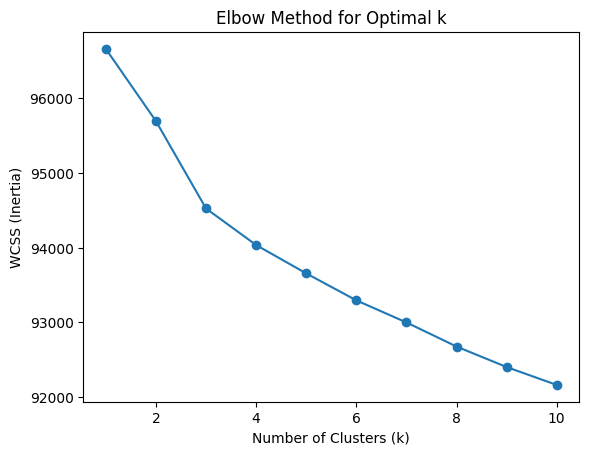

In [72]:
optimal_clusters_elbow(X)

In [5]:
num_clusters = 20  # Adjust based on dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_itens["cluster"] = kmeans.fit_predict(X)

In [7]:
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(kmeans, 'kmeans.pkl')

['kmeans.pkl']

In [6]:
df_itens['cluster'].value_counts()

cluster
2     16563
6     14979
1     13844
11     7693
14     7671
4      4840
13     4380
9      4280
12     4231
15     3160
19     3130
7      2480
3      2188
10     2162
18     1839
0      1783
5      1464
16     1439
8       938
17      936
Name: count, dtype: int64

In [9]:
n_rows_each_cluster = 10
for cluster in range(len(df_itens['cluster'].value_counts())):
    cluster_id = cluster
    
    print('-' * 32 + ' CLUSTER: ' + str(cluster_id) + ' ' + '-' * 32)
    df = df_itens.loc[df_itens['cluster'] == cluster_id].sample(10)
    
    for row in range(0, n_rows_each_cluster):
        print(df.iloc[row]['title'])
        
    

-------------------------------- CLUSTER: 0 --------------------------------
Chuva alaga ruas e invade casas na zona Oeste de Boa Vista
Em oito dias, chuvas na Paraíba superam a média do mês de julho
Transbordamento de dique bloqueia BR-040 em Minas Gerais; chuva deixa cidades alagadas
Redemoinho de poeira é registrado no noroeste do Paraná
VÍDEO: Caminhão do exército que levava mantimentos para distrito no extremo sul da Bahia atola em estrada
Em meio a bairros alagados em Rio Branco e mais de 300 famílias atingidas, vice-prefeita faz piada e paródia do Titanic
Vitória da Conquista, na Bahia, registra a menor temperatura em mais de 10 anos no mês de junho
Cuiabá completa 4 meses sem chuva e previsão é que temperatura chegue a 43°C durante a semana
Forte chuva eleva o nível do Rio Xopotó e causa alagamentos em Alto Rio Doce
São Paulo tem inverno marcado por retorno das geadas, mortes de moradores de rua, queimadas, fuligem e recordes de calor no ano
-------------------------------- CLU